In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import shap

In [30]:
# check version
from pycaret.utils import version
version()

'2.3.5'

In [65]:
df = pd.read_csv('data/athlete_events.csv', index_col=[0])

In [66]:
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN


In [95]:
plt.hist(x='Sex', y='Year', data=df);

ConversionError: Failed to convert value(s) to axis units: 'Year'

<Figure size 432x288 with 1 Axes>

In [4]:
df.drop(columns='id', inplace=True)

In [5]:
X = df.drop(columns='medal')
y = df['medal']

In [ ]:
y

0        No medal
1        No medal
2        No medal
3        No medal
4        No medal
           ...   
41471      Silver
41472      Bronze
41473      Bronze
41474      Bronze
41475      Silver
Name: medal, Length: 41476, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((33180, 305), (8296, 305))

In [28]:
explainer = shap.KernelExplainer(et.predict, data=shap.kmeans(X_train, 2000))
shap_values = explainer.shap_values(shap.kmeans(X_test, 2000))

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
Using 2000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


TypeError: can't multiply sequence by non-int of type 'float'

,age,height,weight,year,sex_F,sex_M,noc_AFG,noc_AHO,noc_ALB,noc_ALG,...,sport_Synchronized Swimming,sport_Table Tennis,sport_Taekwondo,sport_Tennis,sport_Trampolining,sport_Triathlon,sport_Volleyball,sport_Water Polo,sport_Weightlifting,sport_Wrestling
4534,25.0,180.0,71.0,1988.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39352,29.0,162.0,62.0,1960.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23852,19.0,175.0,70.0,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717,26.0,166.4,58.0,1952.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35534,31.0,195.0,101.0,1996.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,23.0,180.0,69.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11800,31.0,182.0,69.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24002,28.0,157.0,55.5,1976.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23952,38.0,176.0,68.5,1994.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
et = ExtraTreesClassifier(bootstrap=True,
                                      max_features=0.35,
                                      min_samples_leaf=3, min_samples_split=14,
                                      random_state=13)

In [17]:
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_features=0.35, min_samples_leaf=3,
                     min_samples_split=14, random_state=13)

In [25]:
from pycaret.classification import *

OSError: dlopen(/opt/anaconda3/envs/olympics/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/envs/olympics/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
!pip install interpret

In [ ]:
!pip install pyyaml==5.4.1 --ignore-installed

     |████████████████████████████████| 636 kB 26.5 MB/s eta 0:00:01


In [ ]:
best_model = compare_models(fold=5)

NameError: ignored

In [ ]:
reg = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'medal',
            session_id=13)

,Description,Value
0,session_id,13
1,Target,medal
2,Target Type,Multiclass
3,Label Encoded,"Bronze: 0, Gold: 1, No medal: 2, Silver: 3"
4,Original Data,"(33180, 306)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,289
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(fold=5, include=['et'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5919,0.7844,0.5916,0.593,0.592,0.4558,0.456,18.212


In [ ]:
et = create_model('et', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5970,0.7856,0.5964,0.5972,0.5970,0.4625,0.4626
1,0.5841,0.7766,0.5837,0.5846,0.5841,0.4453,0.4454
2,0.5914,0.7868,0.5913,0.5931,0.5916,0.4552,0.4555
3,0.6006,0.7909,0.6001,0.6024,0.6009,0.4674,0.4677
4,0.5864,0.7820,0.5867,0.5880,0.5866,0.4487,0.4490
Mean,0.5919,0.7844,0.5916,0.5930,0.5920,0.4558,0.4560
SD,0.0062,0.0048,0.0061,0.0063,0.0063,0.0083,0.0083


In [ ]:
et.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = et.predict(X_test)

ValueError: ignored

In [ ]:
"X_test.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred_2, average='macro')

0.10694655041698256

In [ ]:
y_pred_2 = y_pred_2.replace({2:'No medal', 1:'Gold', 0:'Bronze', 3:'Silver'})

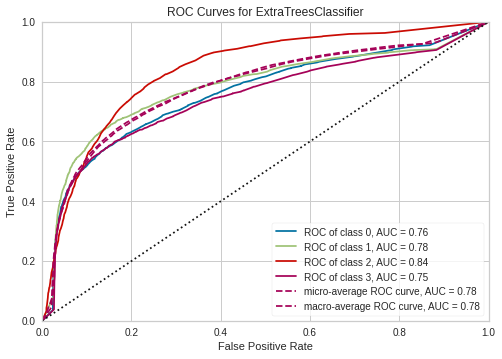

In [ ]:
plot_model(et)

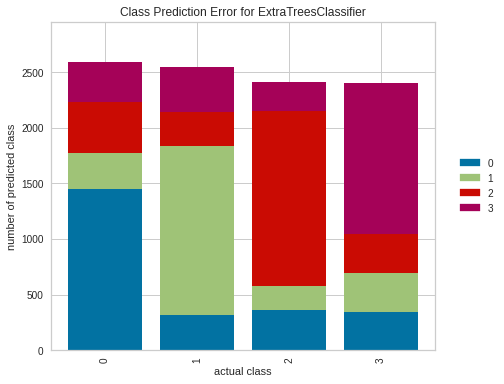

In [ ]:
plot_model(et, plot = 'error')

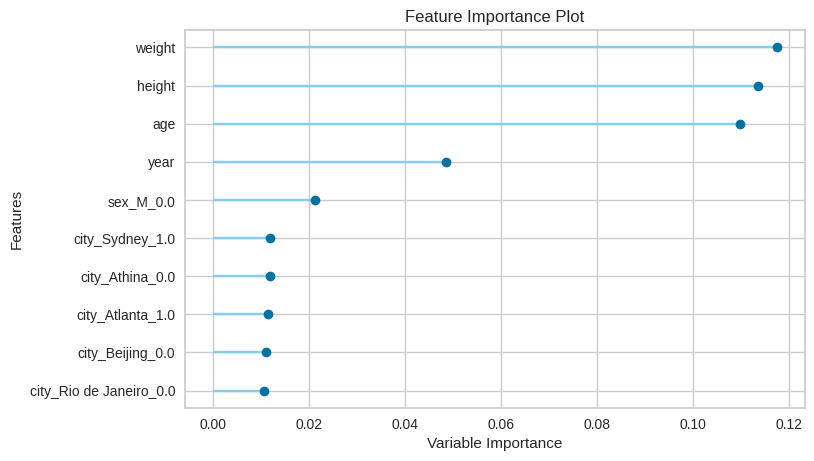

In [ ]:
plot_model(et, plot = 'feature')

In [ ]:
interpret_model(et, plot='msa')

In [ ]:
df

,age,height,weight,year,sex_F,sex_M,noc_AFG,noc_AHO,noc_ALB,noc_ALG,noc_AND,noc_ANG,noc_ANT,noc_ARG,noc_ARM,noc_ARU,noc_ASA,noc_AUS,noc_AUT,noc_AZE,noc_BAH,noc_BAN,noc_BAR,noc_BDI,noc_BEL,noc_BEN,noc_BER,noc_BHU,noc_BIH,noc_BIZ,noc_BLR,noc_BOL,noc_BOT,noc_BRA,noc_BRN,noc_BUL,noc_BUR,noc_CAM,noc_CAN,noc_CAY,...,sport_Curling,sport_Cycling,sport_Diving,sport_Equestrianism,sport_Fencing,sport_Figure Skating,sport_Football,sport_Freestyle Skiing,sport_Golf,sport_Gymnastics,sport_Handball,sport_Hockey,sport_Ice Hockey,sport_Judo,sport_Luge,sport_Modern Pentathlon,sport_Nordic Combined,sport_Rhythmic Gymnastics,sport_Rowing,sport_Rugby Sevens,sport_Sailing,sport_Shooting,sport_Short Track Speed Skating,sport_Skeleton,sport_Ski Jumping,sport_Snowboarding,sport_Softball,sport_Speed Skating,sport_Swimming,sport_Synchronized Swimming,sport_Table Tennis,sport_Taekwondo,sport_Tennis,sport_Trampolining,sport_Triathlon,sport_Volleyball,sport_Water Polo,sport_Weightlifting,sport_Wrestling,medal
0,18.0,175.0,69.0,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No medal
1,27.0,164.0,69.0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No medal
2,24.0,171.0,62.0,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No medal
3,22.0,195.0,87.0,2004.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No medal
4,18.0,160.0,43.0,2000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41471,25.0,168.0,80.0,1956.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Silver
41472,33.0,168.0,80.0,1964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bronze
41473,28.0,182.0,82.0,1980.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
!pip install tpot

  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)
  Using cached stopit-1.1.2.tar.gz (18 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached xgboost-1.5.1-py3-none-win_amd64.whl (106.6 MB)
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=4f696df532032443ce2af71948206ed2eea471410c66c9cbc41af2ea3c88747e
  Stored in directory: c:\users\n\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [ ]:
import autosklearn.classification
import autosklearn.metrics

ModuleNotFoundError: ignored

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   249  100   249    0     0   1717      0 --:--:-- --:--:-- --:--:--  1729
     |████████████████████████████████| 38.1 MB 315 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.5 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 22.3 MB 1.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Suc

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 4.8 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.2-py3-none-any.whl size=6586738 sha256=6ce2bb2ca91f9f56b763dd3d74f822a0191ba9f53950bf8c31c99f1992afec10
  Stored in directory: /root/.cache/pip/wheels/b6/ba/aa/ce7b8deb41019b9c1c6cd0b511d553350b7075ba1d3f0f545c
Successfully built auto-sklearn


In [26]:
import sklearn
print(sklearn.__version__)

1.0.1


In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 23.2 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.5 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.
pycaret 2.3.5 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
auto-sklearn 0.14.2 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0.1 which is incompatible.


In [12]:
from tpot import TPOTClassifier

In [13]:
tpot_clf = TPOTClassifier(generations=100,
                          population_size=200,
                          offspring_size=200,
                          mutation_rate=0.9,
                          crossover_rate=0.1,
                          scoring='neg_log_loss',
                          cv=5,
                          max_time_mins=15,
                          random_state=13,
                          verbosity=3)

In [14]:
tpot_clf.fit(X_train, y_train)

ImportError: Error: could not import xgboost.XGBClassifier.
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ["dlopen(/opt/anaconda3/envs/olympics/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/envs/olympics/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [10]:
tpot_clf

NameError: name 'tpot_clf' is not defined

In [9]:
tpot_clf.fitted_pipeline_

NameError: name 'tpot_clf' is not defined

In [ ]:
predictions = tpot_clf.predict(X_test)
predictions[:5]

array(['Gold', 'Bronze', 'Silver', 'Gold', 'Silver'], dtype=object)

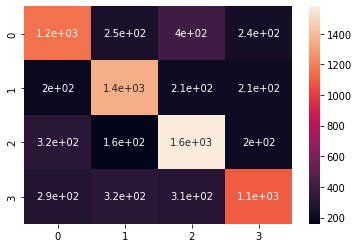

In [ ]:
cf = confusion_matrix(y_test, predictions)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Bronze       0.59      0.56      0.58      2054
        Gold       0.65      0.68      0.67      1980
    No medal       0.63      0.70      0.66      2257
      Silver       0.62      0.55      0.58      2005

    accuracy                           0.62      8296
   macro avg       0.62      0.62      0.62      8296
weighted avg       0.62      0.62      0.62      8296



In [24]:
from flaml import AutoML

automl = AutoML()

automl_settings = {
    "time_budget": 300,
    "metric": 'f1',
    "average": 'macro',
    "task": 'classification',
    "log_file_name": 'mylog.log',
}

In [28]:
automl.fit(X_train=X_train, y_train=y_train.values, ensemble=True,
           **automl_settings)

[flaml.automl: 12-16 21:40:44] {1943} INFO - task = classification
[flaml.automl: 12-16 21:40:44] {1945} INFO - Data split method: stratified
[flaml.automl: 12-16 21:40:44] {1949} INFO - Evaluation method: holdout
[flaml.automl: 12-16 21:40:44] {2019} INFO - Minimizing error metric: 1-f1
[flaml.automl: 12-16 21:40:44] {2071} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 12-16 21:40:44] {2311} INFO - iteration 0, current learner lgbm


OSError: dlopen(/opt/anaconda3/envs/olympics/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/envs/olympics/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)